In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import tensorflow

In [2]:
complaints=pd.read_csv("/content/drive/MyDrive/Consumer_Complaints.csv",
                       low_memory=False)

In [3]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1025010 non-null  object 
 1   Product                       1025010 non-null  object 
 2   Sub-product                   789840 non-null   object 
 3   Issue                         1025010 non-null  object 
 4   Sub-issue                     528853 non-null   object 
 5   Consumer Complaint            277814 non-null   object 
 6   Company Public Response       318364 non-null   object 
 7   Company                       1025010 non-null  object 
 8   State                         1012650 non-null  object 
 9   ZIP code                      1008292 non-null  object 
 10  Tags                          141588 non-null   object 
 11  Consumer consent provided?    491911 non-null   object 
 12  Submitted via               

In [4]:
# Select Rows where complaint is there and delete null rows
complaintsdf=complaints.dropna(subset=["Consumer Complaint"])[["Consumer Complaint",
                                                                 "Product"]]

In [5]:
complaintsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277814 entries, 1 to 1025009
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Consumer Complaint  277814 non-null  object
 1   Product             277814 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [6]:
complaintsdf.Product.value_counts(dropna=False)

Debt collection                                                                 63268
Credit reporting, credit repair services, or other personal consumer reports    49006
Mortgage                                                                        43837
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    16689
Bank account or service                                                         14887
Credit card or prepaid card                                                     10659
Consumer Loan                                                                    9474
Checking or savings account                                                      6489
Money transfer, virtual currency, or money service                               3089
Vehicle loan or lease                                 

In [7]:
complaintsdf.Product=complaintsdf.Product.replace("Credit reporting",
                                                  "Credit reporting, credit repair services, or other personal consumer reports")

In [8]:
complaintsdf.Product=complaintsdf.Product.replace(["Credit card","Prepaid card"],
                                                  "Credit card or prepaid card")

In [9]:
complaintsdf.Product=complaintsdf.Product.replace("Payday loan",
                                                  "Payday loan, title loan, or personal loan")

In [10]:
complaintsdf.Product=complaintsdf.Product.replace(["Money transfers","Virtual currency",
                                                   "Other financial service"],
                                                  "Money transfer, virtual currency, or money service")

In [11]:
# preprocess text data in the complaint
complaintsdf['Consumer Complaint'].head()

1     I have outdated information on my credit repor...
2     I purchased a new car on XXXX XXXX. The car de...
7     An account on my credit report has a mistaken ...
12    This company refuses to provide me verificatio...
16    This complaint is in regards to Square Two Fin...
Name: Consumer Complaint, dtype: object

In [12]:
complaintsdf['Consumer Complaint']=complaintsdf['Consumer Complaint'].str.lower()

In [13]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [14]:
complaintsdf['Consumer Complaint']=[str(clean_txt(x))
for x in complaintsdf['Consumer Complaint']]

In [15]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words=set(stopwords.words("english"))

In [18]:
complaintwords=complaintsdf['Consumer Complaint'].str.split()

In [19]:
wordcloud=WordCloud(height=500,width=1000,
                    stopwords=stop_words).generate(str(complaintwords))

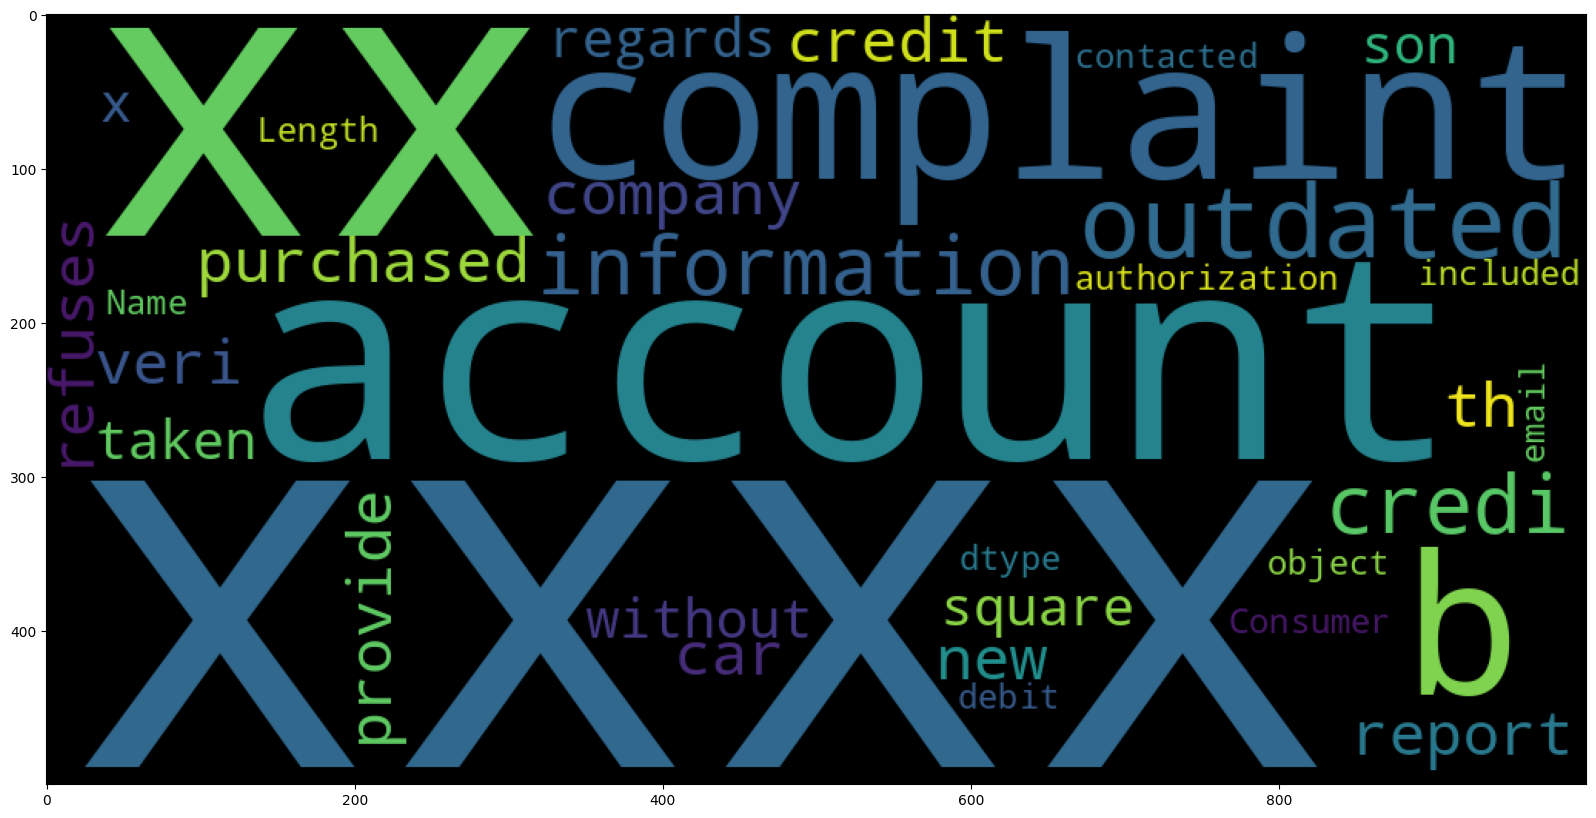

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [21]:
complaintwords=complaintwords.to_list()

In [22]:
from nltk import flatten
from nltk.probability import FreqDist

In [23]:
complaintwords=flatten(complaintwords)

In [24]:
complaintwords=[w for w in complaintwords if len(w)>2]

In [25]:
complaintwords=[w for w in complaintwords if not w in stop_words]

In [26]:
complaintwords=[w for w in complaintwords if not w in ['xxxx']]

In [27]:
FreqDist(complaintwords).most_common(200)

[('credit', 406355),
 ('account', 342904),
 ('would', 194012),
 ('loan', 189376),
 ('payment', 184997),
 ('report', 166850),
 ('information', 160278),
 ('bank', 154461),
 ('debt', 147780),
 ('told', 147104),
 ('received', 133896),
 ('company', 125248),
 ('time', 122195),
 ('called', 117282),
 ('card', 116184),
 ('never', 110174),
 ('payments', 106764),
 ('mortgage', 103666),
 ('pay', 102937),
 ('sent', 101779),
 ('letter', 97745),
 ('back', 95839),
 ('get', 95502),
 ('paid', 93716),
 ('call', 92720),
 ('also', 92069),
 ('said', 88346),
 ('could', 84879),
 ('amount', 84371),
 ('due', 82697),
 ('made', 82198),
 ('phone', 80648),
 ('number', 79728),
 ('reporting', 78859),
 ('money', 77810),
 ('one', 77744),
 ('since', 71493),
 ('asked', 71156),
 ('days', 71113),
 ('balance', 70724),
 ('still', 69466),
 ('collection', 67158),
 ('late', 65229),
 ('years', 65159),
 ('home', 64984),
 ('even', 64382),
 ('date', 61361),
 ('accounts', 61162),
 ('interest', 60953),
 ('month', 58842),
 ('make', 58

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
complaintsdf['Consumer Complaint']=complaintsdf['Consumer Complaint'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [30]:
complaintsdf['Consumer Complaint']=complaintsdf['Consumer Complaint'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in ['xxxx']]))

In [31]:
complaintsdf['Consumer Complaint']=complaintsdf['Consumer Complaint'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [32]:
Max_NB_Words=15000 # Max number of words to be used
Max_Sequence_Length=150 # max number of words per complaint
Embedding_dim=50

In [33]:
from keras.preprocessing.text import Tokenizer

In [34]:
tokenizer=Tokenizer(num_words=Max_NB_Words,lower=True)

In [35]:
tokenizer.fit_on_texts(complaintsdf['Consumer Complaint'].values)

In [36]:
word_index=tokenizer.word_index

In [37]:
X=tokenizer.texts_to_sequences(complaintsdf['Consumer Complaint'].values)

In [38]:
X=tensorflow.keras.utils.pad_sequences(X,maxlen=Max_Sequence_Length)

In [39]:
X.shape

(277814, 150)

In [40]:
y=pd.get_dummies(complaintsdf.Product.values)

In [41]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,SpatialDropout1D,Embedding

In [42]:
model=Sequential()
model.add(Embedding(Max_NB_Words,Embedding_dim,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.20))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(11,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           750000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 11)                1111      
                                                                 
Total params: 811,511
Trainable params: 811,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,y,epochs=5,batch_size=128)

Epoch 1/5
1843/2171 [========================>.....] - ETA: 4:18 - loss: 0.9817 - accuracy: 0.6947